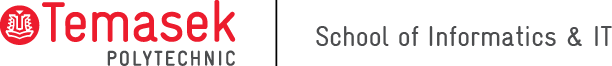
## <center>  Machine Learning for Decision Making (CDA2C05)</center>
### <center>  Practical 1 : Recap Machine Learning </center>

### <font color=blue> Gentle Instructions: </font>
- The empty code cells are for you to experiment your codes. Feel free to add more cells.
- Replace <font color="Purple"><b> ? </font></b> with correct syntax and use short cut key <i> Shift + Enter </i> to execute your cells.
- Double click on markdown cells to enter your remarks, observations, best practices, etc. Execute your markdown cells to view them properly. 

## 1. Preambling
We managed to apply our knowledge of the CRISP-DM framework into the DSES project. Creating useful machine learning models can be complex and involve multiple stages. In this follow-up subject, we will also introduce to you some new pandas, scikit-learn syntaxes, and other packages, to make our model outcomes more accurate, interpretable and actionable to drive better decision making. There will be nine practicals altogether. Let us use this practical to recap the key steps of modelling we've learned in DSES. 

We will study our outcomes in detail for each practical and try to identify what are still some missing gaps to be filled. The gaps will be sequentially bridged with next other practical so that we will finally arrive at an enhanced pipeline of building machine learning models suitable for business use cases.  

<div class="alert alert-block alert-info">
<b>We will recap the steps by building a simple linear regression model for a dataset used in DAVA. </b>
    
    - The target will be 'Price_euros'. 
    - First of all, rename all the provided markdown heading cells that segment the model building process.
</div>

<div class="alert alert-block alert-info">
    <b><i>Data transformation </i> (in DSES terminology) or <i> Features engineering </i> (to be used from now on) applies different techniques to categorical and numerical data respectively. </b>
    
    - Machine models require inputs to be presented by numbers. Thus the first step to features engineering is typically 
    features encoding.  
    - Now, let's learn a new syntax to segment the categorical attributes from the numerical ones in the same df. 
</div>

## 2. Data Understanding

Have you downloaded the dataset from TP LMS?

In [1]:
%pip -V
#import all the necessary libraries
#load the dataset as df

pip 23.3 from C:\Users\javen\AppData\Roaming\Python\Python39\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as ahnaf
import matplotlib.pyplot as plt
import sklearn

df = pd.read_csv("Laptop Prices.csv")
df.shape

(1080, 13)

In [3]:
#Perform basic EDA
df.head()
df.tail(3)

,ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price_euros
1077,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0
1078,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0
1079,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0


Which are the non-numerical attributes? <br>
Ans: Company, Product, TypeName, ScreenResolution, Cpu, Memory, Gpu, OpSys

In [4]:
#Create two different dfs- one that contain purely categorical data, the other only numerical data
df_obj = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(exclude=['object']).drop(columns=['Price_euros', 'ID'])

In [5]:
df_obj.head(2)

,Company,Product,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys
0,Acer,Aspire 3,Notebook,1366x768,AMD A9-Series 9420 3GHz,500GB HDD,AMD Radeon R5,Windows 10
1,Asus,ZenBook UX430UN,Ultrabook,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,512GB SSD,Nvidia GeForce MX150,Windows 10


In [6]:
df_num.head(2)

,Inches,Ram (GB),Weight (Kg)
0,15.6,4,2.1
1,14.0,16,1.3


## 3. Data Preparation

<div class="alert alert-block alert-info">
<b>There are at least three scikit-learn libraries- LabelEncoder, OrdinalEncoder and  that can be used for features encoding.</b>
    
    Discuss with your peers the pros and cons of these different methods.  
</div>

## List the pros and cons here: <br>
### LabelEncoder:

#### Pros:

Simplicity

Memory Efficiency: It consumes less memory compared to one-hot encoding because it doesn't create additional columns.

#### Cons:

Loss of Information: It assigns integer labels to categories, which may be misinterpreted as having meaningful numerical relationships, leading to potential issues in some machine learning algorithms.

Doesn't work for nominal, should not use for regression as ordinal relationships will be made by model as higher label will have more influence.

### OrdinalEncoder:

#### Pros:

Order Preservation: It's designed for ordinal features, preserving the order of categories.

Reduced Memory Usage: It's more memory-efficient compared to one-hot encoding for ordinal data.

#### Cons:

Inappropriate for Nominal Data: It's not suitable for nominal features, where categories have no inherent order.

Limited Applicability: It may not handle complex categorical encoding scenarios with many features or highly cardinal categorical data effectively.

### One-Hot Encoding:

#### Pros:

Preserves Categorical Distinction: It creates binary columns for each category, preserving the distinctness of different categories.

Applicability: It can be applied to both nominal and ordinal data, making it versatile.

Machine Learning Compatibility: One-hot encoding is suitable for most machine learning algorithms, as it avoids introducing artificial relationships.

#### Cons:

Increased Dimensionality: It significantly increases the dimensionality of the dataset, potentially leading to the curse of dimensionality.

Memory Usage: It can consume more memory than label or ordinal encoding, particularly when dealing with high cardinality features.

Collinearity: It introduces multicollinearity, as the presence of one-hot encoded columns can make it impossible to use certain linear models.

<div class="alert alert-block alert-warning">
<b>The syntaxes for implementing these methods are quite similar, we shall focus on testing out LabelEncoder. Please apply the appropriate method(s) for your own use case in e.g., Project. </b>
    
    Provide comments to the following cell.
</div>

In [7]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
df_obj = df_obj.apply(lambda x: d[x.name].fit_transform(x.astype(str)))

<div class="alert alert-block alert-info">
<b>You may need to retrieve the decoded value when you interpret and explain the model outcomes. </b>
    
    - What is the code for getting back the original df?
    - What is the code to print out the mapping?
</div>

In [8]:
orig_df = df_obj.apply(lambda x: d[x.name].inverse_transform(x))
for col in df_obj:
        label_enc = d[col]
        print(f"{col}: {dict(zip(label_enc.transform(label_enc.classes_), label_enc.classes_))}\n")

Company: {0: 'Acer', 1: 'Asus', 2: 'Chuwi', 3: 'Dell', 4: 'Fujitsu', 5: 'HP', 6: 'Huawei', 7: 'LG', 8: 'Lenovo', 9: 'MSI', 10: 'Mediacom', 11: 'Microsoft', 12: 'Razer', 13: 'Samsung', 14: 'Toshiba', 15: 'Vero', 16: 'Xiaomi'}

Product: {0: '110-15ACL (A6-7310/4GB/500GB/W10)', 1: '14-am079na (N3710/8GB/2TB/W10)', 2: '15-AC110nv (i7-6500U/6GB/1TB/Radeon', 3: '15-AY023na (N3710/8GB/2TB/W10)', 4: '15-BA015wm (E2-7110/4GB/500GB/W10)', 5: '15-BS026nv (i5-7200U/8GB/256GB/Radeon', 6: '15-BS028nv (i3-6006U/4GB/1TB/Radeon', 7: '15-BS078nr (i7-7500U/8GB/1TB/W10)', 8: '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 9: '15-BS103nv (i5-8250U/6GB/256GB/Radeon', 10: '15-BW004nv (A9-9420/4GB/256GB/Radeon', 11: '15-BW037na (A9-9420/4GB/1TB/Radeon', 12: '15-BW091ND (A9-9420/6GB/1TB', 13: '15-BW094nd (A6-9220/8GB/128GB/W10)', 14: '15-ay047nv (i3-6006U/6GB/1TB/Radeon', 15: '15-ba043na (A12-9700P/8GB/2TB/W10)', 16: '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)', 17: '15-bs005nv (i3-6006U/4GB/1TB', 18: '15-bs011nv (i7-

<div class="alert alert-block alert-info">
<b>For linear regression, you need to normalise the numerical attributes to interpret the model outcomes meaningfully. </b>
    
    - Refer to DSES P07 if you cannot recall the codes. 
    - You do not have to normalise the target.
</div>

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standardized = scaler.fit_transform(df_num)
df_num = pd.DataFrame(df_standardized, columns=df_num.columns)
df_num

,Inches,Ram (GB),Weight (Kg)
0,0.384811,-0.886852,0.060105
1,-0.761463,1.366795,-1.098292
2,-0.761463,-0.135636,-0.663893
3,0.384811,-0.886852,0.204905
4,0.384811,-0.135636,0.204905
...,...,...,...
1075,-0.761463,-0.886852,-0.374294
1076,-1.262957,1.366795,-1.098292
1077,-0.761463,-1.262459,-0.808693
1078,0.384811,-0.511244,0.190425


## 4. Data Modelling

### <font color=blue> 4.1 Data Modelling

<div class="alert alert-block alert-info">
<b>Now that we have prepared both df_obj and df_num, we need to concatenate them and use as input to the machine learning algorithm. </b>   
</div>

In [10]:
df2 = pd.concat([df_obj , df_num], axis = 1)
X = df2 #set the inputs, cannot include target
y = df['Price_euros'] #set target
print(df_obj.shape)
print(df_num.shape)
print(df2.shape)
df2.head(30)

(1080, 8)
(1080, 3)
(1080, 11)


,Company,Product,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys,Inches,Ram (GB),Weight (Kg)
0,0,54,3,0,13,24,12,0,0.384811,-0.886852,0.060105
1,1,537,4,7,85,25,85,0,-0.761463,1.366795,-1.098292
2,0,385,4,14,66,14,49,0,-0.761463,-0.135636,-0.663893
3,3,207,3,7,47,14,18,0,0.384811,-0.886852,0.204905
4,3,207,3,7,76,14,18,0,0.384811,-0.135636,0.204905
5,3,506,4,12,66,4,49,0,-1.262957,-0.135636,-1.214132
6,1,481,2,0,29,21,34,0,-2.480873,-1.262459,-1.561651
7,8,256,1,14,61,5,62,0,0.384811,-0.135636,0.639304
8,3,212,0,6,66,14,49,0,-1.262957,-0.135636,-0.634933
9,5,8,4,7,85,14,44,0,0.384811,-0.135636,-0.215014


<div class="alert alert-block alert-info">
<b>We will learn new methods of performing data partitioning, for now we will stick to the one time strategy 'train-test-split'. </b>   
</div>

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=1234)

What is the purpose for 'shuffle' and 'random_state'? <br>
Ans: shuffle is for randomly sampling the training dataset. If shuffle is off, it will just split the first 80% as train and last 20% as test. random_state is the seed to ensure that the shuffle is consistent and repeatable when the code is rerun; seed ensures the splitted datasets will always be the same.

### <font color=blue> 4.2 Model Building

<div class="alert alert-block alert-info">
    <b> Let us start building the linear regression model with the training data.   
</div>

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

my_regr= LinearRegression()
my_regr.fit(X_train, y_train)
y_pred = my_regr.predict(X_test)

### <font color=blue> 4.3 Model Validation

In [13]:
y_pred_train = my_regr.predict(X_train)

<div class="alert alert-block alert-info">
<b> Is your trained model reliable?</b>   
    
    - What is the performance?
    - Is there overfitting or underfitting?
</div>

In [14]:
print("MSE for train: %0.2f"% mean_squared_error(y_train, y_pred_train))
print("MSE for valid: %0.2f"% mean_squared_error(y_test, y_pred))

print("R2 for train: %0.2f"% r2_score(y_train, y_pred_train))
print("R2 for valid: %0.2f"% r2_score(y_test, y_pred))

MSE for train: 172725.58
MSE for valid: 132078.97
R2 for train: 0.66
R2 for valid: 0.69


An average prediction (for valid set) deviates from actual price by $363 on average (RMSE). There is no underfitting as R2 for both train and valid are more than 0.5, meaning the predictors have significant influence on the prediction as 69% of the predictions can be explained by the predictors.

There is no overfitting as train R2 is not significantly higher than valid R2.

### <font color=blue> 4.4 Model Interpretation

<div class="alert alert-block alert-info">
<b> What do your model outcomes imply?</b>   
    
    - Are you able to draw any insights?
    - Perhaps it is easier to interpret and understand with visuals.
</div>

#### Intercept

In [15]:
print(my_regr.intercept_)

160.54997673651553


#### Coefficients

In [16]:
print(pd.DataFrame(my_regr.coef_, X.columns, columns=["Coefficient"]))

                  Coefficient
Company             22.403882
Product              0.110333
TypeName            28.227896
ScreenResolution     8.518354
Cpu                  6.062233
Memory               5.996818
Gpu                  5.381796
OpSys               17.084699
Inches             -88.484492
Ram (GB)           412.082632
Weight (Kg)         54.180537


### Equation:

Price_euros=160.55+22.40⋅Company+0.11⋅Product+28.23⋅TypeName+8.52⋅ScreenResolution+6.06⋅Cpu+5.99⋅Memory+5.38⋅Gpu+17.08⋅OpSys−88.48⋅Inches+412.08⋅Ram (GB)+54.18⋅Weight (Kg)

#### Plot of y_pred and y_test

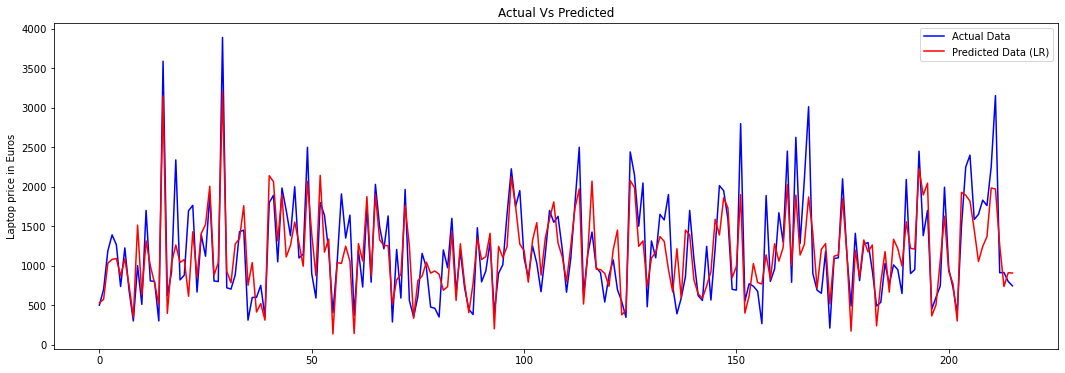

In [17]:
plt.figure(figsize=(18, 6))
plt.plot(y_test.reset_index(drop=True), "blue", label = 'Actual Data')
plt.plot(y_pred, 'red', label = 'Predicted Data (LR)')
plt.ylabel('Laptop price in Euros')
plt.title('Actual Vs Predicted')
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
A. Is there any data point that is prediction goes very wrong? <br>
B. Which laptop is it?
</div>

A. Yes.

In [18]:
# Use the model to make predictions
df['Predicted_Price'] = my_regr.predict(X)

# Calculate the residuals
df['Residuals'] = df['Price_euros'] - df['Predicted_Price']

# Set thresholds for underpredictions and overpredictions
threshold_under = -500
threshold_over = 500

# Filter the data points where the prediction is very wrong (either underpredicted or overpredicted)
wrong_predictions = df[(df['Residuals'] < threshold_under) | (df['Residuals'] > threshold_over)]

# Display the laptops with very wrong predictions
sorted_wrong_predictions = wrong_predictions.sort_values(by='Residuals', ascending=True)
sorted_wrong_predictions.head(5)

,ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price_euros,Predicted_Price,Residuals
760,913,Asus,G701VO-IH74K (i7-6820HK/32GB/2x,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,1279.0,3091.463221,-1812.463221
905,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,3975.0,5544.769549,-1569.769549
411,501,Asus,Rog G752VL-UH71T,Gaming,17.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,24,256GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,4.33,1269.0,2510.871533,-1241.871533
494,595,Lenovo,Ideapad 320-15IKBR,Notebook,15.6,Touchscreen 1366x768,Intel Core i7 8550U 1.8GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.20,609.0,1741.275008,-1132.275008
205,262,HP,Envy 17-U275cl,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,1TB HDD,Nvidia GeForce MX150,Windows 10,2.90,1059.0,1995.585193,-936.585193


In [19]:
sorted_wrong_predictions.tail(5)

,ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price_euros,Predicted_Price,Residuals
723,868,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,2559.0,1121.781190,1437.218810
1022,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,3499.0,2053.834150,1445.165850
769,924,HP,Elitebook Folio,Ultrabook,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8,240GB SSD,Intel HD Graphics 515,Windows 10,1.09,3100.0,990.810082,2109.189918
702,839,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0,3290.314386,2208.685614
154,200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,3200.362119,2898.637881


B) Asus Gaming Laptops are often overpredicted, while HP Elitebook and Razer Blade Pro are often underpredicted.

Your takeaways: 
1. The model looks decent as the predictions follows the actual trend closely
2. Asus Gaming Laptops are cheap and value for price as they are underpriced for its specs
3. HP Elitebook and Razer Blade Pro Laptops are overpriced for its specs
4. The features of a Laptop, especially RAM, can fairly accurately explain the prices of a laptop by 69%.
5. Its interesting and suspicious that buyers would pay more for heavier laptops and pay less for larger screen size inch (based on features importance of coefficients) - doesn't sounds right logically. Perhaps its because gaming laptops are often heavier and they cost more because of better specs for gaming?

## 5. What's next?

Apart from 'blaming' the data, what other further steps can you take? New algorithms? New features engineering?

In this subject, you will be exposed to new tree-based algorithms, common features engineering techniques, and model-agnostic way of interpreting and explaining the model outcomes.

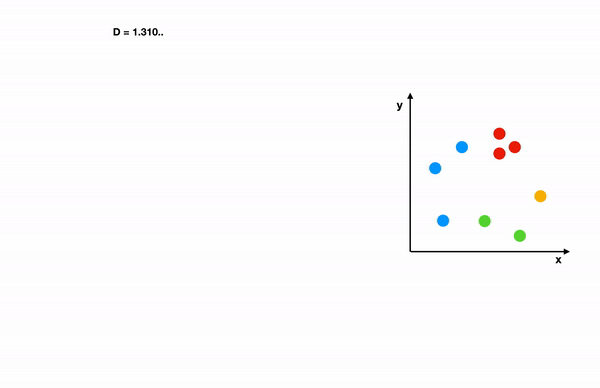

## 6. Summary
We have successfully performed the following:
- recap the typical ML pipeline
- apply a simple label encoding technique on categorical attributes
- be introduced to a new family of algorithms. 

### <center>Remember to save your work <center>